In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display

In [2]:
import os
os.chdir("E:\.SCHOOL\TOLDING_AUDIO")

In [3]:
audioFiles = glob("audio/*.wav")

In [4]:
y, sr = librosa.load(audioFiles[0])
print(f"y: {y[:20]}\ny shape: {y.shape}\nsr: {sr}")

y: [ 2.4185675e-04 -3.6223078e-04 -7.6068914e-04  4.5877125e-05
  2.6007195e-03  6.3275308e-03  9.5964605e-03  1.0598257e-02
  8.4509952e-03  3.7259266e-03 -2.0012143e-03 -7.2070337e-03
 -1.1241298e-02 -1.4288512e-02 -1.6598148e-02 -1.7755924e-02
 -1.6755050e-02 -1.2937453e-02 -7.0768334e-03 -1.6451559e-03]
y shape: (466675,)
sr: 22050


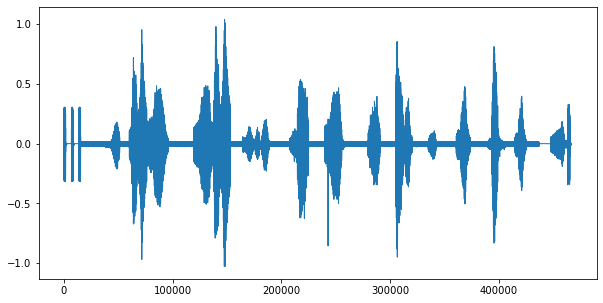

In [21]:
pd.Series(y).plot(figsize = (10,5), lw = 1)
plt.show()

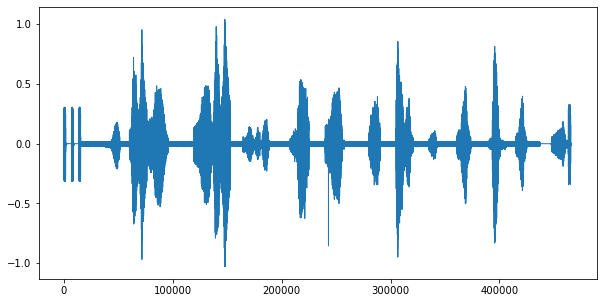

In [8]:
y_trimmed, index = librosa.effects.trim(y, top_db=10)
pd.Series(y_trimmed).plot(figsize = (10,5), lw = 1)
plt.show()

In [9]:
D = librosa.stft(y)
S_db = librosa.amplitude_to_db(abs(D), ref=np.max)
S_db.shape

(1025, 912)

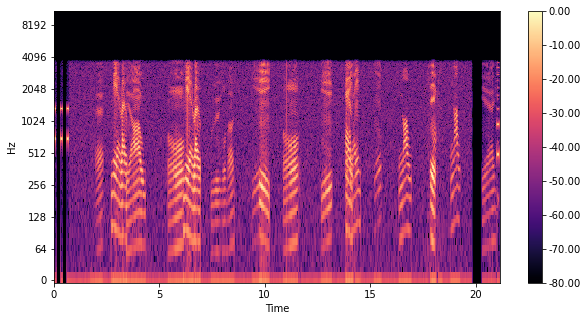

In [10]:
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax = ax)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

In [11]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128)
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

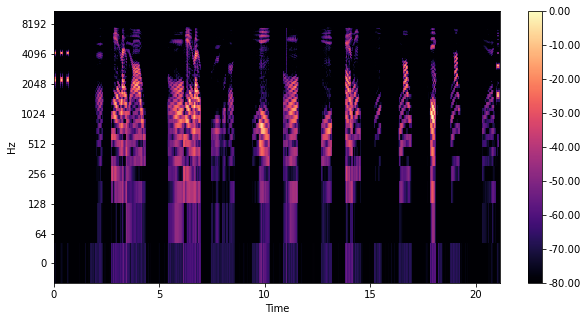

In [12]:
fig, ax = plt.subplots(figsize = (10,5))
img = librosa.display.specshow(S_db_mel,
                              x_axis = 'time',
                              y_axis = 'log',
                              ax = ax)
fig.colorbar(img, ax=ax, format=f"%0.2f")
plt.show()

In [13]:
print(S_db_mel)

[[-73.0289  -73.43198 -75.4714  ... -76.40098 -78.0468  -76.10285]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 ...
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]
 [-80.      -80.      -80.      ... -80.      -80.      -80.     ]]
